<a href="https://colab.research.google.com/github/Shravanya178/MLDL_EXPS/blob/main/MLDL_EXP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

In [37]:
df_eff = df.copy()

df_eff['bee_awareness'] = np.where(
    df_eff['q401_bee_star_label_heard_yn'] == 1, 1, 0
)

df_eff['led_usage'] = np.where(
    df_eff['q405_c_led_bulb_no'] > 0, 1, 0
)

df_eff['high_star_ac'] = np.where(
    df_eff['q434_ac_most_bee_rating'] >= 4, 1, 0
)

df_eff['high_star_fridge'] = np.where(
    df_eff['q469_fridge_most_bee_star'] >= 4, 1, 0
)

df_eff['Efficiency_Score'] = (
    df_eff['bee_awareness'] +
    df_eff['led_usage'] +
    df_eff['high_star_ac'] +
    df_eff['high_star_fridge']
)

df_eff['Efficiency_Score'].value_counts()

,count
Efficiency_Score,
1,7878
2,3693
0,1963
3,1200
4,117


In [38]:
df_eff['Efficiency_Binary'] = np.where(
    df_eff['Efficiency_Score'] >= 3, 1, 0
)

print("Target distribution:")
print(df_eff['Efficiency_Binary'].value_counts())

Target distribution:
Efficiency_Binary
0    13534
1     1317
Name: count, dtype: int64


In [39]:
predictors = [
    'asset_index_1',
    'q208_priminc_earner_edu',
    'q202_resp_age',
    'q213_no_members'
]

df_model = df_eff[predictors + ['Efficiency_Binary']].dropna()

X = df_model[predictors]
y = df_model['Efficiency_Binary']

print("Final dataset shape:", df_model.shape)

Final dataset shape: (14851, 5)


In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train distribution:")
print(y_train.value_counts())

print("Test distribution:")
print(y_test.value_counts())

Train distribution:
Efficiency_Binary
0    10826
1     1054
Name: count, dtype: int64
Test distribution:
Efficiency_Binary
0    2708
1     263
Name: count, dtype: int64


In [41]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

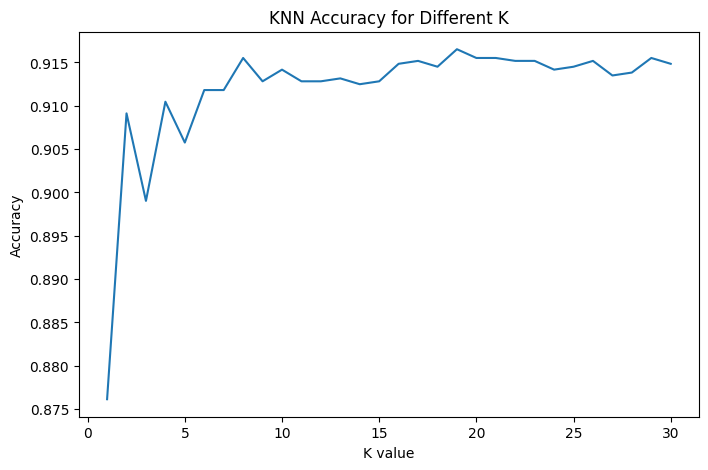

Optimal K: 19


In [42]:
accuracies = []

for k in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(8,5))
plt.plot(range(1,31), accuracies)
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy for Different K")
plt.show()

optimal_k = np.argmax(accuracies) + 1
print("Optimal K:", optimal_k)

In [43]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)
y_prob = knn.predict_proba(X_test_scaled)[:,1]

In [44]:
print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC:", roc_auc_score(y_test, y_prob))

KNN Accuracy: 0.9165264220801077

Confusion Matrix:
[[2686   22]
 [ 226   37]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      2708
           1       0.63      0.14      0.23       263

    accuracy                           0.92      2971
   macro avg       0.77      0.57      0.59      2971
weighted avg       0.90      0.92      0.89      2971

ROC-AUC: 0.8459619715699436


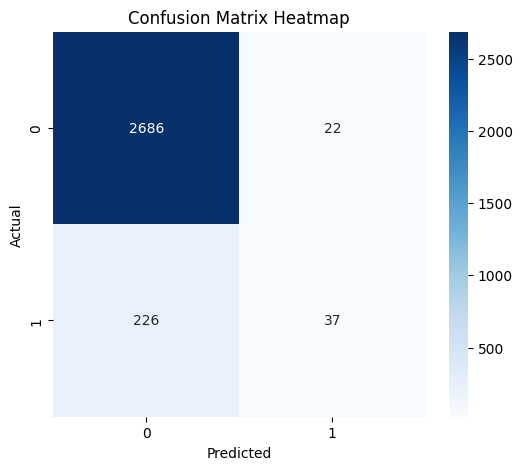

In [45]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

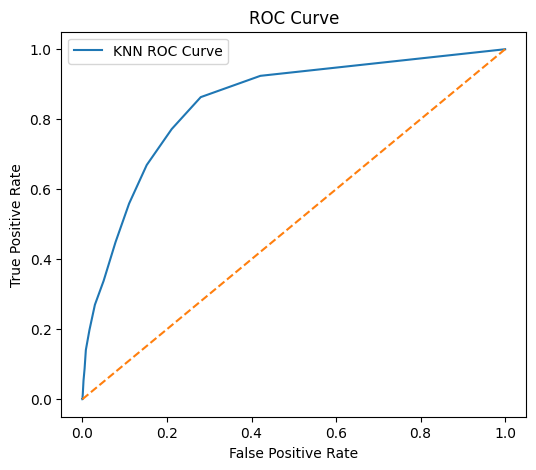

In [46]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label="KNN ROC Curve")
plt.plot([0,1],[0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [47]:
knn = KNeighborsClassifier(
    n_neighbors=7,     # smaller K
    weights='distance' # distance weighting
)

knn.fit(X_train_scaled, y_train)

y_prob = knn.predict_proba(X_test_scaled)[:,1]

In [48]:
threshold = 0.35   # try 0.3–0.4

y_pred = (y_prob >= threshold).astype(int)

In [49]:
print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC:", roc_auc_score(y_test, y_prob))

Accuracy: 0.8791652642208011

Confusion Matrix:
[[2511  197]
 [ 162  101]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      2708
           1       0.34      0.38      0.36       263

    accuracy                           0.88      2971
   macro avg       0.64      0.66      0.65      2971
weighted avg       0.89      0.88      0.88      2971

ROC-AUC: 0.7808823033849852


In [50]:
from sklearn.metrics import balanced_accuracy_score

# Balanced Accuracy
bal_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", bal_acc)

# Sensitivity (Recall for class 1)
sensitivity = cm[1,1] / (cm[1,1] + cm[1,0])
print("Sensitivity (Recall for High Efficiency):", sensitivity)

# Specificity (Recall for class 0)
specificity = cm[0,0] / (cm[0,0] + cm[0,1])
print("Specificity (Low/Moderate Detection):", specificity)

Balanced Accuracy: 0.6556415015922404
Sensitivity (Recall for High Efficiency): 0.3840304182509506
Specificity (Low/Moderate Detection): 0.9272525849335302


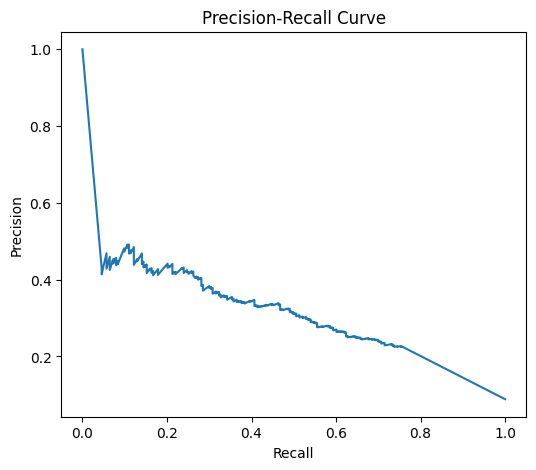

Average Precision Score: 0.2875477833290389


In [51]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

ap_score = average_precision_score(y_test, y_prob)
print("Average Precision Score:", ap_score)

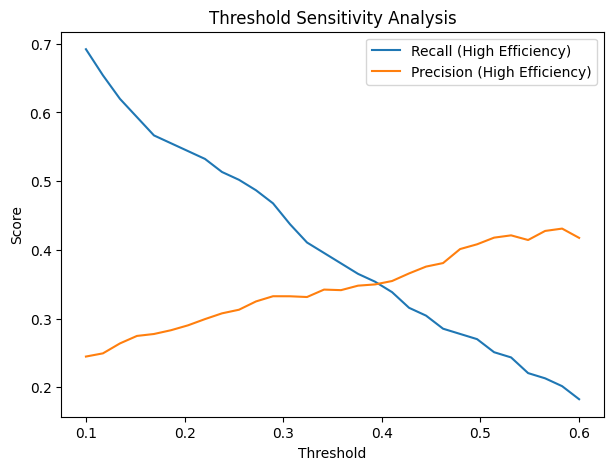

In [52]:
thresholds_test = np.linspace(0.1, 0.6, 30)

recall_list = []
precision_list = []

for t in thresholds_test:
    y_temp = (y_prob >= t).astype(int)
    recall_list.append(
        classification_report(y_test, y_temp, output_dict=True)['1']['recall']
    )
    precision_list.append(
        classification_report(y_test, y_temp, output_dict=True)['1']['precision']
    )

plt.figure(figsize=(7,5))
plt.plot(thresholds_test, recall_list, label="Recall (High Efficiency)")
plt.plot(thresholds_test, precision_list, label="Precision (High Efficiency)")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.title("Threshold Sensitivity Analysis")
plt.show()